[Ep15] 문자를 읽을 수 있는 딥러닝

<<목차>>


1. 검증용 데이터셋 준비

2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

3. 테스트 결과 정리

4. 결과 분석과 결론 제시

5. 루브릭

6. 회고

In [28]:
pip install tesseract-ocr

  Using cached tesseract-ocr-0.0.1.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      /home/june/anaconda3/lib/python3.9/site-packages/setuptools/dist.py:757: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      file tesseract_ocr.py (for module tesseract_ocr) not found
      file tesseract_ocr.py (for module tesseract_ocr) not found
      running build_ext
      building 'tesseract_ocr' extension
      creating build
      creating build/temp.linux-x86_64-3.9
      gcc -pthread -B /home/june/anaconda3/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/june/anaconda3/include -I/home/june/anacond

In [29]:
pip install keras_ocr


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install pytesseract


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install easyocr


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

import io

import keras_ocr
import cv2

import os
import pytesseract
from PIL import Image
from pytesseract import Output

import glob
import easyocr

1. 검증용 데이터셋 준비

In [33]:
def get_img_path_n_file_list(work_dir= '/home.=/june/Github/Exploration/data/ep15', img_ext='.jpg'):
  img_path_list = [img_path for img_path in glob.glob(work_dir + '/*') if img_path.endswith(img_ext)]
  img_file_list = [img_file for img_file in os.listdir(work_dir) if img_file.endswith(img_ext)]
  return img_path_list, img_file_list

In [34]:
work_dir = '/home/june/Github/Exploration/data/ep15'
img_ext = '.jpg'
img_path_list, img_file_list = get_img_path_n_file_list(work_dir, img_ext)

In [35]:
img_path_list.sort()
img_path_list

['/home/june/Github/Exploration/data/ep15/1.jpg',
 '/home/june/Github/Exploration/data/ep15/2.jpg',
 '/home/june/Github/Exploration/data/ep15/3.jpg',
 '/home/june/Github/Exploration/data/ep15/4.jpg',
 '/home/june/Github/Exploration/data/ep15/5.jpg']

In [36]:
img_path_list.sort()
img_path_list

['/home/june/Github/Exploration/data/ep15/1.jpg',
 '/home/june/Github/Exploration/data/ep15/2.jpg',
 '/home/june/Github/Exploration/data/ep15/3.jpg',
 '/home/june/Github/Exploration/data/ep15/4.jpg',
 '/home/june/Github/Exploration/data/ep15/5.jpg']

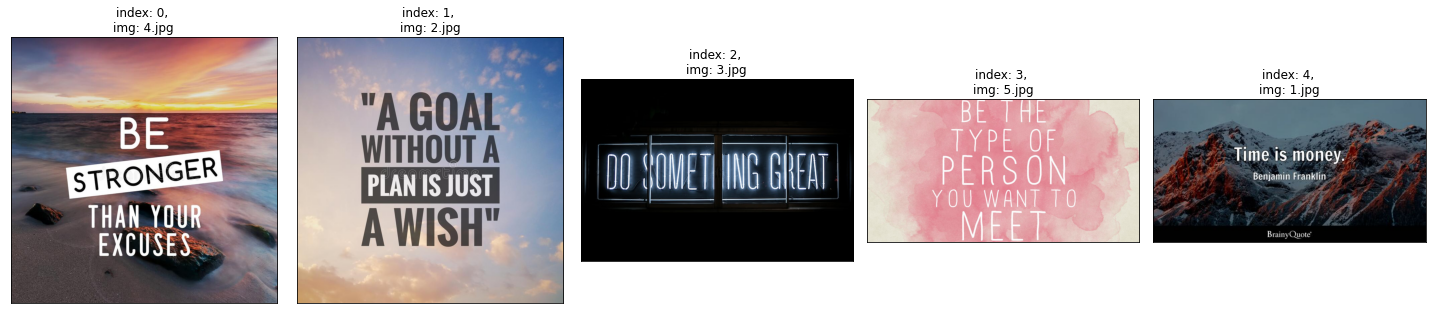

In [37]:
plt.figure(figsize=(20, 20))

for i, (img_path, img_file) in enumerate(zip(img_path_list, img_file_list)):
    plt.subplot(5, 5, i+1)
    plt.title(f'index: {i}, \nimg: {img_file}')

    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

    plt.tight_layout()

plt.show()

2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

In [38]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/june/.keras-ocr/craft_mlt_25k.h5
Looking for /home/june/.keras-ocr/crnn_kurapan.h5


In [39]:
images = [keras_ocr.tools.read(img_path) for img_path in img_path_list]
prediction_groups = [pipeline.recognize([img_path]) for img_path in img_path_list]

1/1 [==============================] - 0s 26ms/step


In [40]:
def draw_keras_ocr(images, prediction_groups):
  # Plot the predictions
  fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
  fig.tight_layout()
  for idx, ax in enumerate(axs):
      keras_ocr.tools.drawAnnotations(image=images[idx], 
                                      predictions=prediction_groups[idx][0], ax=ax)

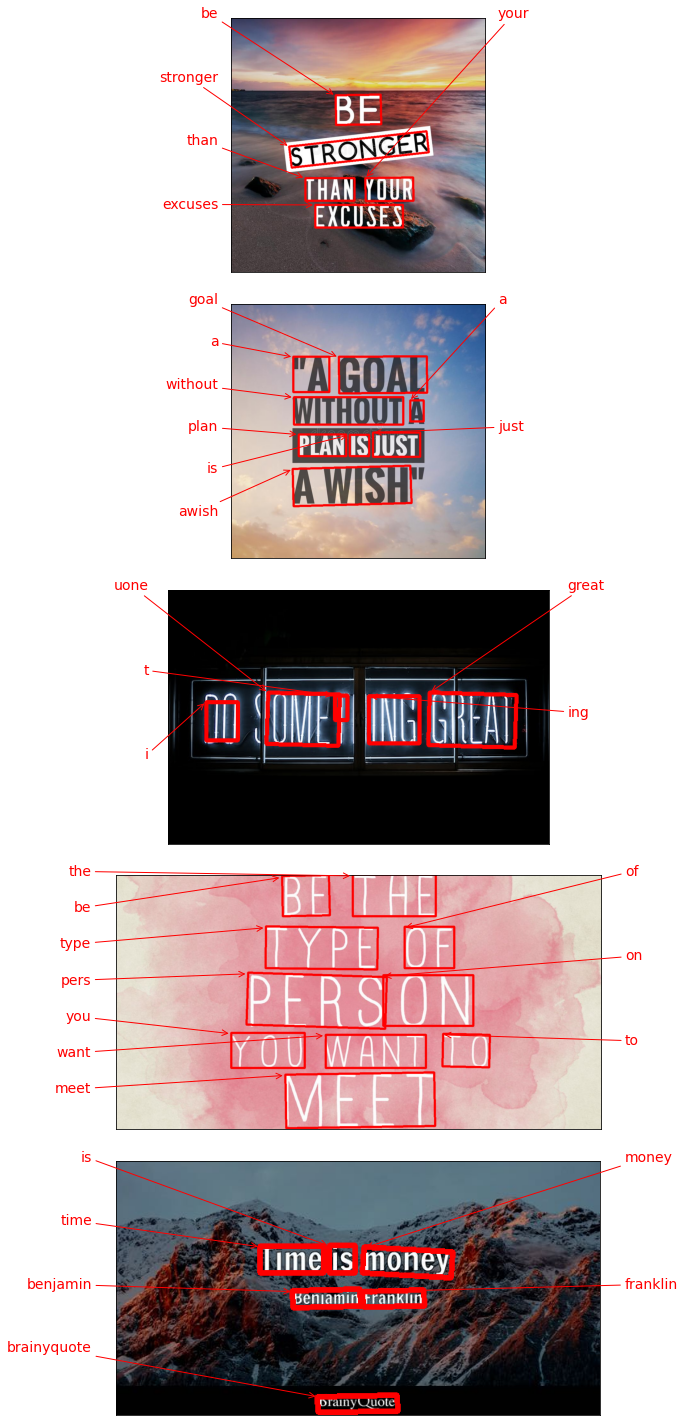

In [41]:
draw_keras_ocr(images, prediction_groups)

1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?

기획한 서비스가 OCR 적용 가능한 서비스이며, OCR 기술을 활용했을 때 더 유용한지에 대한 타당성 여부를 기술하였다.


2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?

앞서 기획한 서비스에서 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시하고, 평가기준에 적합한 테스트 데이터의 특징이 무엇인지 설명하였다.


3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?

최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

6. 회고

- 이번 프로젝트에서 **어려웠던 점,**


- 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**


- 루브릭 평가 지표를 맞추기 위해 **시도한 것들**


- 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**


- **자기 다짐**
